<a href="https://colab.research.google.com/github/hirokikawagishi/kaggle/blob/main/Portfolio_(house_prices_advanced_regression_techniques).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ライブラリインポート

import os
import pickle
import gc

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.metrics import mean_squared_error

import lightgbm as lgb
import warnings
warnings.filterwarnings("ignore")

**データ読み込み**

In [ ]:
df_train = pd.read_csv("train.csv")
display(df_train.head())
print(df_train.shape)

df_test = pd.read_csv("test.csv")
display(df_test.head())
print(df_test.shape)

sample_submission = pd.read_csv("sample_submission.csv")
display(sample_submission.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


(1459, 80)


,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


**ベースライン作成**

In [ ]:
# dfのカラムを全て表示

pd.set_option("display.max_columns", None)
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# print(df_train.info())
# print(df_test.info())

In [ ]:
# ベースライン用データ作成(trainとtest結合)

df = pd.concat([df_train, df_test], ignore_index=True)
df.shape

(2919, 81)

In [ ]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,NaN,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
2918,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


In [ ]:
# YearBuilt分布確認

print(df['YearBuilt'].min())
print(df['YearBuilt'].max())

1872
2010


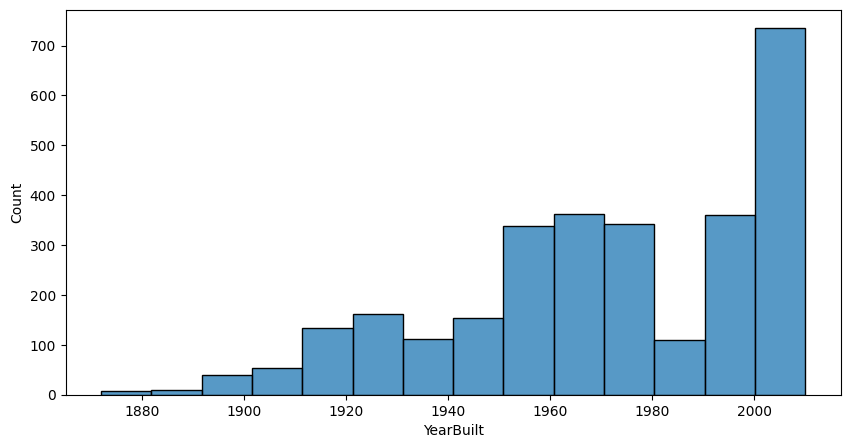

In [ ]:
plt.figure(figsize=(10, 5))

sns.histplot(df["YearBuilt"], kde=False, bins=14)
plt.show()

In [ ]:
# ベースライン用データ作成(重要と予測した説明変数)

df2 = df[['LotArea', 'Utilities', 'OverallQual', 'OverallCond', 'YearBuilt', 'Heating', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'TotRmsAbvGrd', 'YrSold', 'SalePrice']]

In [ ]:
#display(y_train.head())
#display(id_train.head())

In [ ]:
# シェイプ確認

print(df2.shape)
df2.head()

(2919, 13)


,LotArea,Utilities,OverallQual,OverallCond,YearBuilt,Heating,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,TotRmsAbvGrd,YrSold,SalePrice
0,8450,AllPub,7,5,2003,GasA,856,854,0,1710,8,2008,208500.0
1,9600,AllPub,6,8,1976,GasA,1262,0,0,1262,6,2007,181500.0
2,11250,AllPub,7,5,2001,GasA,920,866,0,1786,6,2008,223500.0
3,9550,AllPub,7,5,1915,GasA,961,756,0,1717,7,2006,140000.0
4,14260,AllPub,8,5,2000,GasA,1145,1053,0,2198,9,2008,250000.0


In [ ]:
# ラベルエンコーディング(関数化)

le = LabelEncoder()

def label_encoder(df, columns):
  object_columns2 = []
  for col in columns:
    le.fit(df[col])
    df[col + "_le"] = le.transform(df[col])
    object_columns2.append(col + "_le")

  print(object_columns2)
  return object_columns2

In [ ]:
# objectカラムをラベルエンコーディング→intへ

object_columns = df2.columns[df2.dtypes == "object"]
object_columns2 = label_encoder(df2, object_columns)

['Utilities_le', 'Heating_le']


In [ ]:
df2[['Utilities', 'Utilities_le', 'Heating', 'Heating_le']].head()

,Utilities,Utilities_le,Heating,Heating_le
0,AllPub,0,GasA,1
1,AllPub,0,GasA,1
2,AllPub,0,GasA,1
3,AllPub,0,GasA,1
4,AllPub,0,GasA,1


In [ ]:
# info確認

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       2919 non-null   int64  
 1   Utilities     2917 non-null   object 
 2   OverallQual   2919 non-null   int64  
 3   OverallCond   2919 non-null   int64  
 4   YearBuilt     2919 non-null   int64  
 5   Heating       2919 non-null   object 
 6   1stFlrSF      2919 non-null   int64  
 7   2ndFlrSF      2919 non-null   int64  
 8   LowQualFinSF  2919 non-null   int64  
 9   GrLivArea     2919 non-null   int64  
 10  TotRmsAbvGrd  2919 non-null   int64  
 11  YrSold        2919 non-null   int64  
 12  SalePrice     1460 non-null   float64
 13  Utilities_le  2919 non-null   int64  
 14  Heating_le    2919 non-null   int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 342.2+ KB


In [ ]:
# ラベルエンコーディングしたカラムに変換

columns_object = df2[df2.columns[df2.dtypes == "object"]]
df3 = df2.drop(columns=columns_object)
print(df3.shape)
df3.head()

(2919, 13)


,LotArea,OverallQual,OverallCond,YearBuilt,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,TotRmsAbvGrd,YrSold,SalePrice,Utilities_le,Heating_le
0,8450,7,5,2003,856,854,0,1710,8,2008,208500.0,0,1
1,9600,6,8,1976,1262,0,0,1262,6,2007,181500.0,0,1
2,11250,7,5,2001,920,866,0,1786,6,2008,223500.0,0,1
3,9550,7,5,1915,961,756,0,1717,7,2006,140000.0,0,1
4,14260,8,5,2000,1145,1053,0,2198,9,2008,250000.0,0,1


In [ ]:
# ↓テストデータと分割

print(df3['SalePrice'].isnull())
train = df3[~df3['SalePrice'].isnull()]
test = df3[df3['SalePrice'].isnull()]

0       False
1       False
2       False
3       False
4       False
        ...  
2914     True
2915     True
2916     True
2917     True
2918     True
Name: SalePrice, Length: 2919, dtype: bool


In [ ]:
# シェイプ確認

print(train.shape)
display(train.head())
display(train.tail())
print(test.shape)
display(test.head())

(1460, 13)


,LotArea,OverallQual,OverallCond,YearBuilt,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,TotRmsAbvGrd,YrSold,SalePrice,Utilities_le,Heating_le
0,8450,7,5,2003,856,854,0,1710,8,2008,208500.0,0,1
1,9600,6,8,1976,1262,0,0,1262,6,2007,181500.0,0,1
2,11250,7,5,2001,920,866,0,1786,6,2008,223500.0,0,1
3,9550,7,5,1915,961,756,0,1717,7,2006,140000.0,0,1
4,14260,8,5,2000,1145,1053,0,2198,9,2008,250000.0,0,1


,LotArea,OverallQual,OverallCond,YearBuilt,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,TotRmsAbvGrd,YrSold,SalePrice,Utilities_le,Heating_le
1455,7917,6,5,1999,953,694,0,1647,7,2007,175000.0,0,1
1456,13175,6,6,1978,2073,0,0,2073,7,2010,210000.0,0,1
1457,9042,7,9,1941,1188,1152,0,2340,9,2010,266500.0,0,1
1458,9717,5,6,1950,1078,0,0,1078,5,2010,142125.0,0,1
1459,9937,5,6,1965,1256,0,0,1256,6,2008,147500.0,0,1


(1459, 13)


,LotArea,OverallQual,OverallCond,YearBuilt,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,TotRmsAbvGrd,YrSold,SalePrice,Utilities_le,Heating_le
1460,11622,5,6,1961,896,0,0,896,5,2010,NaN,0,1
1461,14267,6,6,1958,1329,0,0,1329,6,2010,NaN,0,1
1462,13830,5,5,1997,928,701,0,1629,6,2010,NaN,0,1
1463,9978,6,6,1998,926,678,0,1604,7,2010,NaN,0,1
1464,5005,8,5,1992,1280,0,0,1280,5,2010,NaN,0,1


In [ ]:
# テストデータ作成

test = test.drop(columns=["SalePrice"])
print(test.shape)
test.head()

(1459, 12)


,LotArea,OverallQual,OverallCond,YearBuilt,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,TotRmsAbvGrd,YrSold,Utilities_le,Heating_le
1460,11622,5,6,1961,896,0,0,896,5,2010,0,1
1461,14267,6,6,1958,1329,0,0,1329,6,2010,0,1
1462,13830,5,5,1997,928,701,0,1629,6,2010,0,1
1463,9978,6,6,1998,926,678,0,1604,7,2010,0,1
1464,5005,8,5,1992,1280,0,0,1280,5,2010,0,1


In [ ]:
# トレインデータ(x_train, y_train)作成

y_train = train[['SalePrice']]
x_train = train.drop(columns=["SalePrice"])

print(train.shape)
print(x_train.shape)
print(y_train.shape)

(1460, 13)
(1460, 12)
(1460, 1)


In [ ]:
x_train.head()

,LotArea,OverallQual,OverallCond,YearBuilt,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,TotRmsAbvGrd,YrSold,Utilities_le,Heating_le
0,8450,7,5,2003,856,854,0,1710,8,2008,0,1
1,9600,6,8,1976,1262,0,0,1262,6,2007,0,1
2,11250,7,5,2001,920,866,0,1786,6,2008,0,1
3,9550,7,5,1915,961,756,0,1717,7,2006,0,1
4,14260,8,5,2000,1145,1053,0,2198,9,2008,0,1


In [ ]:
# モデル学習(関数化)

params = {
    "boosting_type": "gbdt",
    "objective": "regression_l1",
    "metric": "mean_absolute_error",
    "learning_rate": 0.05,
    "num_leaves": 32,
    "subsample": 0.7,
    "subsample_freq": 1,
    "feature_fraction": 0.8,
    "min_data_in_leaf": 50,
    "min_sum_hessian_in_leaf": 50,
    "n_estimators": 1000,
    "random_state": 123,
    "importance_type": "gain"
}

def train_cv(input_x, input_y, input_category):

  metrics = []
  imp = pd.DataFrame()

  #x_tr, x_base, y_tr, y_base = train_test_split(x_train, y_train, test_size=0.2, random_state=0, shuffle=True)
  x_tr, x_base, y_tr, y_base = train_test_split(input_x, input_y, test_size=0.2, random_state=0, shuffle=True)
  print(x_tr.shape, x_base.shape, y_tr.shape, y_base.shape)

  n_splits = 5
  cv = list(KFold(n_splits=n_splits, shuffle=True, random_state=0).split(x_tr, y_tr))

  for nfold in range(n_splits):
    print("-"*20, nfold, "-"*20)
    idx_tr2, idx_va = cv[nfold][0], cv[nfold][1]
    x_tr2, y_tr2 = x_tr.iloc[idx_tr2, :], y_tr.iloc[idx_tr2, :]
    x_va, y_va = x_tr.iloc[idx_va, :], y_tr.iloc[idx_va, :]

    model = lgb.LGBMRegressor(**params)
    #model.fit(x_tr2, y_tr2, eval_set=[(x_tr2, y_tr2), (x_base, y_base)], categorical_feature=['Utilities_le', 'Heating_le'],
    model.fit(x_tr2, y_tr2, eval_set=[(x_tr2, y_tr2), (x_base, y_base)], categorical_feature=input_category,
              callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=100),])
                        #lgb.log_evaluation(10)])

    y_tr2_pred = model.predict(x_tr2)
    y_va_pred = model.predict(x_va)
    y_base_pred = model.predict(x_base)

    #metric_tr2 = accuracy_score(y_tr2, y_tr2_pred)
    #metric_va = accuracy_score(y_va, y_va_pred)

    metric_tr2 = model.score(x_tr2, y_tr2)
    metric_va = model.score(x_va, y_va)
    metric_base = model.score(x_base, y_base)

    print(f"[スコア] tr2: {metric_tr2:.2f}, va: {metric_va:.2f}")
    metrics.append([nfold, metric_tr2, metric_va, metric_base])

    _imp = pd.DataFrame({"col": x_tr.columns, "imp": model.feature_importances_, "nfold":nfold})
    imp = pd.concat([imp, _imp], axis=0, ignore_index=True)

  print("-"*20, "result", "-"*20)
  metrics = np.array(metrics)
  print(metrics)

  print(f"[cv ] tr2: {metrics[:,1].mean():.2f}+-{metrics[:,1].std():.2f}, va: {metrics[:,2].mean():.2f}+-{metrics[:,2].std():.2f}, base: {metrics[:,3].mean():.2f}+-{metrics[:,3].std():.2f}")

  # imp定義

  imp = imp.groupby("col")["imp"].agg(["mean", "std"])
  imp.columns = ["imp", "imp_std"]
  imp = imp.reset_index(drop=False)
  print("Done.")

  return metrics, imp, model, y_base_pred

In [ ]:
# モデル学習

metrics, imp, model, y_base_pred = train_cv(x_train, y_train, object_columns2)

(1168, 12) (292, 12) (1168, 1) (292, 1)
-------------------- 0 --------------------
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=50, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=50, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000214 seconds.
You can set `force_col_wise=true` to remove 

In [ ]:
# y_base_pred[:5]

array([241607.14001462, 169642.30761262, 107024.25294679, 183668.76704119,
       101717.84999266])

In [ ]:
# feature_importances_確認

imp.sort_values("imp", ascending=False, ignore_index=True)

,col,imp,imp_std
0,YearBuilt,4964.218534,779.987080
1,GrLivArea,4712.035345,791.191568
2,1stFlrSF,3664.190422,856.389057
3,LotArea,3622.179003,1120.136206
4,OverallQual,3375.017648,353.647646
5,2ndFlrSF,1150.534857,320.944024
6,OverallCond,920.148404,163.569531
7,YrSold,694.303318,248.512827
8,TotRmsAbvGrd,519.724908,163.275800
9,Heating_le,0.000000,0.000000


**submissionデータ作成**

In [ ]:
# テストデータ確認

print(test.shape)
test.head()

(1459, 12)


,LotArea,OverallQual,OverallCond,YearBuilt,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,TotRmsAbvGrd,YrSold,Utilities_le,Heating_le
1460,11622,5,6,1961,896,0,0,896,5,2010,0,1
1461,14267,6,6,1958,1329,0,0,1329,6,2010,0,1
1462,13830,5,5,1997,928,701,0,1629,6,2010,0,1
1463,9978,6,6,1998,926,678,0,1604,7,2010,0,1
1464,5005,8,5,1992,1280,0,0,1280,5,2010,0,1


In [ ]:
# submissionデータ作成(関数化)

def submit_create(input_test, input_test_base):

  # y_test_pred作成
  y_test_pred = model.predict(input_test)

  # 元のテストデータ("Id"アリ)にSalePriceを結合
  df_test_SP = input_test_base.copy()
  df_test_SP["SalePrice"] = y_test_pred
  #df_test_SP.head()

  # "Id", "SalePrice"だけのdf作成
  submit_df = df_test_SP[["Id", "SalePrice"]].set_index("Id")
  #submit_df.head()

  submit_df.to_csv("submission.csv")

  return y_test_pred

In [ ]:
# submission用データ作成

y_test_pred = submit_create(test, df_test)

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=50, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8


In [ ]:
# submission用predict確認

y_test_pred

array([128997.22755228, 170560.7177625 , 182900.16772209, ...,
       161359.14767976, 142052.92752533, 208925.55457232])

**↓特徴量追加1**

In [ ]:
# df2再定義(ベースラインのdf)

df2 = df[['LotArea', 'Utilities', 'OverallQual', 'OverallCond', 'YearBuilt', 'Heating', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'TotRmsAbvGrd', 'YrSold']]

In [ ]:
# ベースラインのdfに新たに重要と予測した説明変数追加

df3 = pd.concat([df2, df[["Condition1", "Condition2", "YearRemodAdd", "Exterior1st", "Exterior2nd", "ExterQual", "ExterCond", "Foundation", "TotalBsmtSF", "BedroomAbvGr", "KitchenAbvGr",
                   "KitchenQual", "Functional", "Fireplaces", "FireplaceQu", "GarageType", "PoolArea", "PoolQC", "SalePrice"]]], axis=1)

In [ ]:
# df3データ確認

print(df3.shape)
df3.head()

(2919, 31)


,LotArea,Utilities,OverallQual,OverallCond,YearBuilt,Heating,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,TotRmsAbvGrd,YrSold,Condition1,Condition2,YearRemodAdd,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,TotalBsmtSF,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,PoolArea,PoolQC,SalePrice
0,8450,AllPub,7,5,2003,GasA,856,854,0,1710,8,2008,Norm,Norm,2003,VinylSd,VinylSd,Gd,TA,PConc,856.0,3,1,Gd,Typ,0,NaN,Attchd,0,NaN,208500.0
1,9600,AllPub,6,8,1976,GasA,1262,0,0,1262,6,2007,Feedr,Norm,1976,MetalSd,MetalSd,TA,TA,CBlock,1262.0,3,1,TA,Typ,1,TA,Attchd,0,NaN,181500.0
2,11250,AllPub,7,5,2001,GasA,920,866,0,1786,6,2008,Norm,Norm,2002,VinylSd,VinylSd,Gd,TA,PConc,920.0,3,1,Gd,Typ,1,TA,Attchd,0,NaN,223500.0
3,9550,AllPub,7,5,1915,GasA,961,756,0,1717,7,2006,Norm,Norm,1970,Wd Sdng,Wd Shng,TA,TA,BrkTil,756.0,3,1,Gd,Typ,1,Gd,Detchd,0,NaN,140000.0
4,14260,AllPub,8,5,2000,GasA,1145,1053,0,2198,9,2008,Norm,Norm,2000,VinylSd,VinylSd,Gd,TA,PConc,1145.0,4,1,Gd,Typ,1,TA,Attchd,0,NaN,250000.0


In [ ]:
# train_columns = list(df3.columns)
# print(train_columns)

['LotArea', 'Utilities', 'OverallQual', 'OverallCond', 'YearBuilt', 'Heating', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'TotRmsAbvGrd', 'YrSold', 'Condition1', 'Condition2', 'YearRemodAdd', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'TotalBsmtSF', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'PoolArea', 'PoolQC', 'SalePrice']


In [ ]:
# df3 info確認

df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       2919 non-null   int64  
 1   Utilities     2917 non-null   object 
 2   OverallQual   2919 non-null   int64  
 3   OverallCond   2919 non-null   int64  
 4   YearBuilt     2919 non-null   int64  
 5   Heating       2919 non-null   object 
 6   1stFlrSF      2919 non-null   int64  
 7   2ndFlrSF      2919 non-null   int64  
 8   LowQualFinSF  2919 non-null   int64  
 9   GrLivArea     2919 non-null   int64  
 10  TotRmsAbvGrd  2919 non-null   int64  
 11  YrSold        2919 non-null   int64  
 12  Condition1    2919 non-null   object 
 13  Condition2    2919 non-null   object 
 14  YearRemodAdd  2919 non-null   int64  
 15  Exterior1st   2918 non-null   object 
 16  Exterior2nd   2918 non-null   object 
 17  ExterQual     2919 non-null   object 
 18  ExterCond     2919 non-null 

In [ ]:
# 欠損値補完(float64)(必要なし？)

print(df3['TotalBsmtSF'].isnull().sum())

1


In [ ]:
df3['TotalBsmtSF'] = df3['TotalBsmtSF'].fillna(0)

In [ ]:
# intへ変換(必要なし？)

df3['TotalBsmtSF'] = df3['TotalBsmtSF'].astype("int")

In [ ]:
# objectカラムをラベルエンコーディング

object_columns = df3.columns[df3.dtypes == "object"]
object_columns

Index(['Utilities', 'Heating', 'Condition1', 'Condition2', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'PoolQC'],
      dtype='object')

In [ ]:
# テストデータ ラベルエンコーディング(関数使用)

object_columns2 = label_encoder(df3, object_columns)

['Utilities_le', 'Heating_le', 'Condition1_le', 'Condition2_le', 'Exterior1st_le', 'Exterior2nd_le', 'ExterQual_le', 'ExterCond_le', 'Foundation_le', 'KitchenQual_le', 'Functional_le', 'FireplaceQu_le', 'GarageType_le', 'PoolQC_le']


In [ ]:
# ラベルエンコーディングしたものに変換

columns_object = df3[df3.columns[df3.dtypes == "object"]]
df4 = df3.drop(columns=columns_object)
print(df4.shape)
df4.head()

(2919, 31)


,LotArea,OverallQual,OverallCond,YearBuilt,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,TotRmsAbvGrd,YrSold,YearRemodAdd,TotalBsmtSF,BedroomAbvGr,KitchenAbvGr,Fireplaces,PoolArea,SalePrice,Utilities_le,Heating_le,Condition1_le,Condition2_le,Exterior1st_le,Exterior2nd_le,ExterQual_le,ExterCond_le,Foundation_le,KitchenQual_le,Functional_le,FireplaceQu_le,GarageType_le,PoolQC_le
0,8450,7,5,2003,856,854,0,1710,8,2008,2003,856,3,1,0,0,208500.0,0,1,2,2,12,13,2,4,2,2,6,5,1,3
1,9600,6,8,1976,1262,0,0,1262,6,2007,1976,1262,3,1,1,0,181500.0,0,1,1,2,8,8,3,4,1,3,6,4,1,3
2,11250,7,5,2001,920,866,0,1786,6,2008,2002,920,3,1,1,0,223500.0,0,1,2,2,12,13,2,4,2,2,6,4,1,3
3,9550,7,5,1915,961,756,0,1717,7,2006,1970,756,3,1,1,0,140000.0,0,1,2,2,13,15,3,4,0,2,6,2,5,3
4,14260,8,5,2000,1145,1053,0,2198,9,2008,2000,1145,4,1,1,0,250000.0,0,1,2,2,12,13,2,4,2,2,6,4,1,3


In [ ]:
# ↓テストデータと分割

print(df4['SalePrice'].isnull())
train = df4[~df4['SalePrice'].isnull()]
test = df4[df4['SalePrice'].isnull()]

0       False
1       False
2       False
3       False
4       False
        ...  
2914     True
2915     True
2916     True
2917     True
2918     True
Name: SalePrice, Length: 2919, dtype: bool


In [ ]:
# 分割したデータ確認

print(train.shape)
display(train.head())
display(train.tail())
print(test.shape)
display(test.head())

(1460, 31)


,LotArea,OverallQual,OverallCond,YearBuilt,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,TotRmsAbvGrd,YrSold,YearRemodAdd,TotalBsmtSF,BedroomAbvGr,KitchenAbvGr,Fireplaces,PoolArea,SalePrice,Utilities_le,Heating_le,Condition1_le,Condition2_le,Exterior1st_le,Exterior2nd_le,ExterQual_le,ExterCond_le,Foundation_le,KitchenQual_le,Functional_le,FireplaceQu_le,GarageType_le,PoolQC_le
0,8450,7,5,2003,856,854,0,1710,8,2008,2003,856,3,1,0,0,208500.0,0,1,2,2,12,13,2,4,2,2,6,5,1,3
1,9600,6,8,1976,1262,0,0,1262,6,2007,1976,1262,3,1,1,0,181500.0,0,1,1,2,8,8,3,4,1,3,6,4,1,3
2,11250,7,5,2001,920,866,0,1786,6,2008,2002,920,3,1,1,0,223500.0,0,1,2,2,12,13,2,4,2,2,6,4,1,3
3,9550,7,5,1915,961,756,0,1717,7,2006,1970,756,3,1,1,0,140000.0,0,1,2,2,13,15,3,4,0,2,6,2,5,3
4,14260,8,5,2000,1145,1053,0,2198,9,2008,2000,1145,4,1,1,0,250000.0,0,1,2,2,12,13,2,4,2,2,6,4,1,3


,LotArea,OverallQual,OverallCond,YearBuilt,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,TotRmsAbvGrd,YrSold,YearRemodAdd,TotalBsmtSF,BedroomAbvGr,KitchenAbvGr,Fireplaces,PoolArea,SalePrice,Utilities_le,Heating_le,Condition1_le,Condition2_le,Exterior1st_le,Exterior2nd_le,ExterQual_le,ExterCond_le,Foundation_le,KitchenQual_le,Functional_le,FireplaceQu_le,GarageType_le,PoolQC_le
1455,7917,6,5,1999,953,694,0,1647,7,2007,2000,953,3,1,1,0,175000.0,0,1,2,2,12,13,3,4,2,3,6,4,1,3
1456,13175,6,6,1978,2073,0,0,2073,7,2010,1988,1542,3,1,2,0,210000.0,0,1,2,2,9,10,3,4,1,3,2,4,1,3
1457,9042,7,9,1941,1188,1152,0,2340,9,2010,2006,1152,4,1,2,0,266500.0,0,1,2,2,5,5,0,2,4,2,6,2,1,3
1458,9717,5,6,1950,1078,0,0,1078,5,2010,1996,1078,2,1,0,0,142125.0,0,1,2,2,8,8,3,4,1,2,6,5,1,3
1459,9937,5,6,1965,1256,0,0,1256,6,2008,1965,1256,3,1,0,0,147500.0,0,1,2,2,6,6,2,4,1,3,6,5,1,3


(1459, 31)


,LotArea,OverallQual,OverallCond,YearBuilt,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,TotRmsAbvGrd,YrSold,YearRemodAdd,TotalBsmtSF,BedroomAbvGr,KitchenAbvGr,Fireplaces,PoolArea,SalePrice,Utilities_le,Heating_le,Condition1_le,Condition2_le,Exterior1st_le,Exterior2nd_le,ExterQual_le,ExterCond_le,Foundation_le,KitchenQual_le,Functional_le,FireplaceQu_le,GarageType_le,PoolQC_le
1460,11622,5,6,1961,896,0,0,896,5,2010,1961,882,2,1,0,0,NaN,0,1,1,2,12,13,3,4,1,3,6,5,1,3
1461,14267,6,6,1958,1329,0,0,1329,6,2010,1958,1329,3,1,0,0,NaN,0,1,2,2,13,14,3,4,1,2,6,5,1,3
1462,13830,5,5,1997,928,701,0,1629,6,2010,1998,928,3,1,1,0,NaN,0,1,2,2,12,13,3,4,2,3,6,4,1,3
1463,9978,6,6,1998,926,678,0,1604,7,2010,1998,926,3,1,1,0,NaN,0,1,2,2,12,13,3,4,2,2,6,2,1,3
1464,5005,8,5,1992,1280,0,0,1280,5,2010,1992,1280,2,1,0,0,NaN,0,1,2,2,6,6,2,4,2,2,6,5,1,3


In [ ]:
# テストデータ作成

test = test.drop(columns=["SalePrice"])
print(test.shape)
test.head()

(1459, 30)


,LotArea,OverallQual,OverallCond,YearBuilt,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,TotRmsAbvGrd,YrSold,YearRemodAdd,TotalBsmtSF,BedroomAbvGr,KitchenAbvGr,Fireplaces,PoolArea,Utilities_le,Heating_le,Condition1_le,Condition2_le,Exterior1st_le,Exterior2nd_le,ExterQual_le,ExterCond_le,Foundation_le,KitchenQual_le,Functional_le,FireplaceQu_le,GarageType_le,PoolQC_le
1460,11622,5,6,1961,896,0,0,896,5,2010,1961,882,2,1,0,0,0,1,1,2,12,13,3,4,1,3,6,5,1,3
1461,14267,6,6,1958,1329,0,0,1329,6,2010,1958,1329,3,1,0,0,0,1,2,2,13,14,3,4,1,2,6,5,1,3
1462,13830,5,5,1997,928,701,0,1629,6,2010,1998,928,3,1,1,0,0,1,2,2,12,13,3,4,2,3,6,4,1,3
1463,9978,6,6,1998,926,678,0,1604,7,2010,1998,926,3,1,1,0,0,1,2,2,12,13,3,4,2,2,6,2,1,3
1464,5005,8,5,1992,1280,0,0,1280,5,2010,1992,1280,2,1,0,0,0,1,2,2,6,6,2,4,2,2,6,5,1,3


In [ ]:
# トレインデータ(x_train, y_train)作成

y_train = train[['SalePrice']]
x_train = train.drop(columns=["SalePrice"])

print(train.shape)
print(x_train.shape)
print(y_train.shape)

(1460, 31)
(1460, 30)
(1460, 1)


In [ ]:
# モデル学習(関数使用)

metrics, imp, model, y_base_pred = train_cv(x_train, y_train, object_columns2)

(1168, 30) (292, 30) (1168, 1) (292, 1)
-------------------- 0 --------------------
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=50, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=50, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000345 seconds.
You can set `force_row_wise=true` to remove 

In [ ]:
# y_base_pred[:5]

array([254886.1634582 , 160996.11044362, 109755.42269199, 204537.3091516 ,
        98526.48603131])

In [ ]:
# feature_importances_確認

imp.sort_values("imp", ascending=False, ignore_index=True)

,col,imp,imp_std
0,GrLivArea,4186.659758,484.418058
1,YearBuilt,3380.899367,354.609089
2,OverallQual,3141.049773,319.465842
3,LotArea,2823.168396,495.211001
4,TotalBsmtSF,2635.339943,476.260756
5,1stFlrSF,2315.251878,606.354587
6,YearRemodAdd,1805.238200,410.506810
7,2ndFlrSF,1005.163638,266.420048
8,OverallCond,759.003963,134.778890
9,KitchenQual_le,669.371084,107.922526


**submissionデータ作成2**

In [ ]:
# テストデータ確認

print(test.shape)
test.head()

(1459, 30)


,LotArea,OverallQual,OverallCond,YearBuilt,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,TotRmsAbvGrd,YrSold,YearRemodAdd,TotalBsmtSF,BedroomAbvGr,KitchenAbvGr,Fireplaces,PoolArea,Utilities_le,Heating_le,Condition1_le,Condition2_le,Exterior1st_le,Exterior2nd_le,ExterQual_le,ExterCond_le,Foundation_le,KitchenQual_le,Functional_le,FireplaceQu_le,GarageType_le,PoolQC_le
1460,11622,5,6,1961,896,0,0,896,5,2010,1961,882,2,1,0,0,0,1,1,2,12,13,3,4,1,3,6,5,1,3
1461,14267,6,6,1958,1329,0,0,1329,6,2010,1958,1329,3,1,0,0,0,1,2,2,13,14,3,4,1,2,6,5,1,3
1462,13830,5,5,1997,928,701,0,1629,6,2010,1998,928,3,1,1,0,0,1,2,2,12,13,3,4,2,3,6,4,1,3
1463,9978,6,6,1998,926,678,0,1604,7,2010,1998,926,3,1,1,0,0,1,2,2,12,13,3,4,2,2,6,2,1,3
1464,5005,8,5,1992,1280,0,0,1280,5,2010,1992,1280,2,1,0,0,0,1,2,2,6,6,2,4,2,2,6,5,1,3


In [ ]:
# submissionデータ作成(関数使用)

y_test_pred = submit_create(test, df_test)

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=50, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8


In [ ]:
# submission用predict確認

y_test_pred

array([125720.8415537 , 155308.29398708, 188686.28731135, ...,
       162430.18011172, 136045.61557199, 217726.25871826])